In [1]:
import yfinance as yf
import numpy as np

def beta(ticker, start_date, end_date):
    # Descargar datos de la acción y S&P 500
    stock = yf.download(ticker, start=start_date, end=end_date)
    sp500 = yf.download('^GSPC', start=start_date, end=end_date)

    # obtener el adj. close de la acción
    stock_adj_close = stock['Adj Close']
    sp500_adj_close = sp500['Adj Close']

    # Alinear las fechas de ambos DataFrames usando precios ajustados
    data_frame = stock_adj_close.align(sp500_adj_close, join='inner')

    # Acceder a las columnas
    stock_prices = data_frame[0]  # Precios ajustados de la acción
    sp500_prices = data_frame[1]  # Precios ajustados de S&P 500

    # Calcular rendimientos: (P_t+1 / P_t) - 1
    stock_returns = (stock_prices[1:].values / stock_prices[:-1].values) - 1    # [1:] desde el segundo elemento hasta el final, [:-1] desde el primero hasta el penúltimo - 1
    sp500_returns = (sp500_prices[1:].values / sp500_prices[:-1].values) - 1    # [1:] desde el segundo elemento hasta el final, [:-1] desde el primero hasta el penúltimo - 1

    ## Así se calculan manual
    # cov_stock_sp500 = sum((stock_returns - stock_returns.mean()) * (sp500_returns - sp500_returns.mean())) / (len(stock_returns) - 1)
    # var_sp500 = sum((sp500_returns - sp500_returns.mean())**2) / (len(sp500_returns) - 1)

    cov_matrix = np.cov(stock_returns, sp500_returns, ddof=1)    # Calcular covarianza muestral
    cov_stock_sp500 = cov_matrix[0, 1]                           # Covarianza entre la acción y S&P 500
    var_sp500 = np.var(sp500_returns, ddof=1)                    # Varianza muestral del S&P 500
    var_stock = np.var(stock_returns, ddof=1)                    # Varianza muestral de la acción
    beta = cov_stock_sp500 / var_sp500                           # Beta de la acción             

    # Calcular el retorno total de la acción
    stock_initial_price = stock_adj_close.iloc[0]                # iloc[0] es el primer elemento
    stock_final_price = stock_adj_close.iloc[-1]                 # iloc[-1] es el último elemento
    stock_total_return = (stock_final_price / stock_initial_price) - 1

    print("\nAnálisis de", ticker)
    print("Covarianza muestral entre la acción y S&P 500:", cov_stock_sp500)
    print("Varianza muestral de S&P 500:", var_sp500)
    print("Varianza muestral de la acción:", var_stock)
    print("Beta de la acción:", beta)
    print("Retorno total de la acción:", stock_total_return)


start_date = '2014-04-10'
end_date = '2024-04-10'

beta('NKE', start_date, end_date)
beta('DIS', start_date, end_date)
beta('MSFT', start_date, end_date)
beta('COST', start_date, end_date)
beta('AMZN', start_date, end_date)
beta('AAPL', start_date, end_date)
beta('TSLA', start_date, end_date)
beta('NFLX', start_date, end_date)
beta('GOOGL', start_date, end_date)
beta('SBUX', start_date, end_date)
beta('KO', start_date, end_date)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed



Análisis de la acción: NKE
Covarianza muestral entre la acción y S&P 500: 0.0001286777052378674
Varianza muestral de S&P 500: 0.0001244647742401509
Varianza muestral de la acción: 0.00032961499695751144
Beta de la acción: 1.0338483801817515
Retorno total de la acción: 1.8058263953833844


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed



Análisis de la acción: DIS
Covarianza muestral entre la acción y S&P 500: 0.00012407966554789875
Varianza muestral de S&P 500: 0.0001244647742401509
Varianza muestral de la acción: 0.0002976647114347027
Beta de la acción: 0.9969058820489314
Retorno total de la acción: 0.6591663181224316


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed



Análisis de la acción: MSFT
Covarianza muestral entre la acción y S&P 500: 0.000150684117430239
Varianza muestral de S&P 500: 0.0001244647742401509
Varianza muestral de la acción: 0.0002889201190643332
Beta de la acción: 1.2106567368169463
Retorno total de la acción: 11.789586831918584


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed



Análisis de la acción: COST
Covarianza muestral entre la acción y S&P 500: 9.017351875214071e-05
Varianza muestral de S&P 500: 0.0001244647742401509
Varianza muestral de la acción: 0.00018021270968418313
Beta de la acción: 0.7244902768887341
Retorno total de la acción: 6.947704602846746


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed



Análisis de la acción: AMZN
Covarianza muestral entre la acción y S&P 500: 0.0001419457350961848
Varianza muestral de S&P 500: 0.0001244647742401509
Varianza muestral de la acción: 0.0004308843288450914
Beta de la acción: 1.1404490624978352
Retorno total de la acción: 10.710131851915742


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed



Análisis de la acción: AAPL
Covarianza muestral entre la acción y S&P 500: 0.00014885107318145385
Varianza muestral de S&P 500: 0.0001244647742401509
Varianza muestral de la acción: 0.0003185985713307458
Beta de la acción: 1.1959293228962142
Retorno total de la acción: 9.303341045021178


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed



Análisis de la acción: TSLA
Covarianza muestral entre la acción y S&P 500: 0.0001795752841168005
Varianza muestral de S&P 500: 0.0001244647742401509
Varianza muestral de la acción: 0.0012124843235088354
Beta de la acción: 1.4427799770103273
Retorno total de la acción: 11.993780263243808


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed



Análisis de la acción: NFLX
Covarianza muestral entre la acción y S&P 500: 0.00014626430503904912
Varianza muestral de S&P 500: 0.0001244647742401509
Varianza muestral de la acción: 0.0007780210337001872
Beta de la acción: 1.1751461884053773
Retorno total de la acción: 11.92803241010164


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed



Análisis de la acción: GOOGL
Covarianza muestral entre la acción y S&P 500: 0.00014272786603063034
Varianza muestral de S&P 500: 0.0001244647742401509
Varianza muestral de la acción: 0.0003102923249367497
Beta de la acción: 1.146733016646472
Retorno total de la acción: 4.729023838689983


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed



Análisis de la acción: SBUX
Covarianza muestral entre la acción y S&P 500: 0.00012458452809866998
Varianza muestral de S&P 500: 0.0001244647742401509
Varianza muestral de la acción: 0.0002684295536357684
Beta de la acción: 1.0009621506104853
Retorno total de la acción: 1.9883000090381984


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Análisis de la acción: KO
Covarianza muestral entre la acción y S&P 500: 7.567698761986967e-05
Varianza muestral de S&P 500: 0.0001244647742401509
Varianza muestral de la acción: 0.0001270809381960258
Beta de la acción: 0.6080193217870085
Retorno total de la acción: 1.109438535152043


In [5]:
import yfinance as yf
import numpy as np

def beta(ticker, start_date, end_date):
    # Descargar datos de la acción y S&P 500
    stock = yf.download(ticker, start=start_date, end=end_date)
    sp500 = yf.download('^GSPC', start=start_date, end=end_date)

    # obtener el adj. close de la acción
    stock_adj_close = stock['Adj Close']
    sp500_adj_close = sp500['Adj Close']

    # Alinear las fechas de ambos DataFrames usando precios ajustados
    data_frame = stock_adj_close.align(sp500_adj_close, join='inner')

    # Acceder correctamente a las columnas alineadas
    stock_prices = data_frame[0]  # Precios ajustados de la acción
    sp500_prices = data_frame[1]  # Precios ajustados de S&P 500

    # Calcular rendimientos: (P_t+1 / P_t) - 1
    stock_returns = (stock_prices[1:].values / stock_prices[:-1].values) - 1
    sp500_returns = (sp500_prices[1:].values / sp500_prices[:-1].values) - 1

    cov_matrix = np.cov(stock_returns, sp500_returns, ddof=1)    # Calcular covarianza muestral
    cov_stock_sp500 = cov_matrix[0, 1]                           # Covarianza entre la acción y S&P 500
    var_sp500 = np.var(sp500_returns, ddof=1)                    # Varianza muestral del S&P 500
    var_stock = np.var(stock_returns, ddof=1)                    # Varianza muestral de la acción
    beta_value = cov_stock_sp500 / var_sp500                     # Beta de la acción             

    # Calcular el retorno total de la acción
    stock_initial_price = stock_adj_close.iloc[0]                # iloc[0] es el primer elemento
    stock_final_price = stock_adj_close.iloc[-1]                 # iloc[-1] es el último elemento
    stock_total_return = (stock_final_price / stock_initial_price) - 1

    print("\nAnálisis de:", ticker)
    print("Covarianza muestral entre", ticker , "y S&P 500:", cov_stock_sp500)
    print("Varianza muestral de S&P 500:", var_sp500)
    print("Varianza muestral de",  ticker, ":", var_stock)
    print("Beta de",  ticker, ":", beta_value)
    print("Retorno total de",  ticker, ":", stock_total_return)

    return {
        "ticker": ticker,
        "cov_stock_sp500": cov_stock_sp500,
        "var_sp500": var_sp500,
        "var_stock": var_stock,
        "beta": beta_value,
        "stock_total_return": stock_total_return
    }

start_date = '2014-04-10'
end_date = '2024-04-10'

results = []
tickers = ['NKE', 'DIS', 'MSFT', 'COST', 'AMZN', 'AAPL', 'TSLA', 'NFLX', 'GOOGL', 'SBUX', 'KO']

for ticker in tickers:
    result = beta(ticker, start_date, end_date)
    results.append(result)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Análisis de: NKE
Covarianza muestral entre NKE y S&P 500: 0.0001286777052378674
Varianza muestral de S&P 500: 0.0001244647742401509
Varianza muestral de NKE : 0.00032961499695751144
Beta de NKE : 1.0338483801817515
Retorno total de NKE : 1.8058263953833844

Análisis de: DIS
Covarianza muestral entre DIS y S&P 500: 0.00012407966554789875
Varianza muestral de S&P 500: 0.0001244647742401509
Varianza muestral de DIS : 0.0002976647114347027
Beta de DIS : 0.9969058820489314
Retorno total de DIS : 0.6591663181224316

Análisis de: MSFT
Covarianza muestral entre MSFT y S&P 500: 0.000150684117430239
Varianza muestral de S&P 500: 0.0001244647742401509
Varianza muestral de MSFT : 0.0002889201190643332
Beta de MSFT : 1.2106567368169463
Retorno total de MSFT : 11.789586831918584

Análisis de: COST
Covarianza muestral entre COST y S&P 500: 9.017351875214071e-05
Varianza muestral de S&P 500: 0.0001244647742401509
Varianza muestral de COST : 0.00018021270968418313
Beta de COST : 0.7244902768887341
Ret


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Análisis de: AMZN
Covarianza muestral entre AMZN y S&P 500: 0.0001419457350961848
Varianza muestral de S&P 500: 0.0001244647742401509
Varianza muestral de AMZN : 0.0004308843288450914
Beta de AMZN : 1.1404490624978352
Retorno total de AMZN : 10.710131851915742

Análisis de: AAPL
Covarianza muestral entre AAPL y S&P 500: 0.00014885107318145385
Varianza muestral de S&P 500: 0.0001244647742401509
Varianza muestral de AAPL : 0.0003185985713307458
Beta de AAPL : 1.1959293228962142
Retorno total de AAPL : 9.303341045021178

Análisis de: TSLA
Covarianza muestral entre TSLA y S&P 500: 0.0001795752841168005
Varianza muestral de S&P 500: 0.0001244647742401509
Varianza muestral de TSLA : 0.0012124843235088354
Beta de TSLA : 1.4427799770103273
Retorno total de TSLA : 11.993780263243808

Análisis de: NFLX
Covarianza muestral entre NFLX y S&P 500: 0.00014626430503904912
Varianza muestral de S&P 500: 0.0001244647742401509
Varianza muestral de NFLX : 0.0007780210337001872
Beta de NFLX : 1.17514618840


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Análisis de: GOOGL
Covarianza muestral entre GOOGL y S&P 500: 0.00014272786603063034
Varianza muestral de S&P 500: 0.0001244647742401509
Varianza muestral de GOOGL : 0.0003102923249367497
Beta de GOOGL : 1.146733016646472
Retorno total de GOOGL : 4.729023838689983

Análisis de: SBUX
Covarianza muestral entre SBUX y S&P 500: 0.00012458452809866998
Varianza muestral de S&P 500: 0.0001244647742401509
Varianza muestral de SBUX : 0.0002684295536357684
Beta de SBUX : 1.0009621506104853
Retorno total de SBUX : 1.9883000090381984

Análisis de: KO
Covarianza muestral entre KO y S&P 500: 7.567698761986967e-05
Varianza muestral de S&P 500: 0.0001244647742401509
Varianza muestral de KO : 0.0001270809381960258
Beta de KO : 0.6080193217870085
Retorno total de KO : 1.109438535152043


C:\Users\herie\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\herie\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\herie\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\herie\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127752 (\N{RAINBOW}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


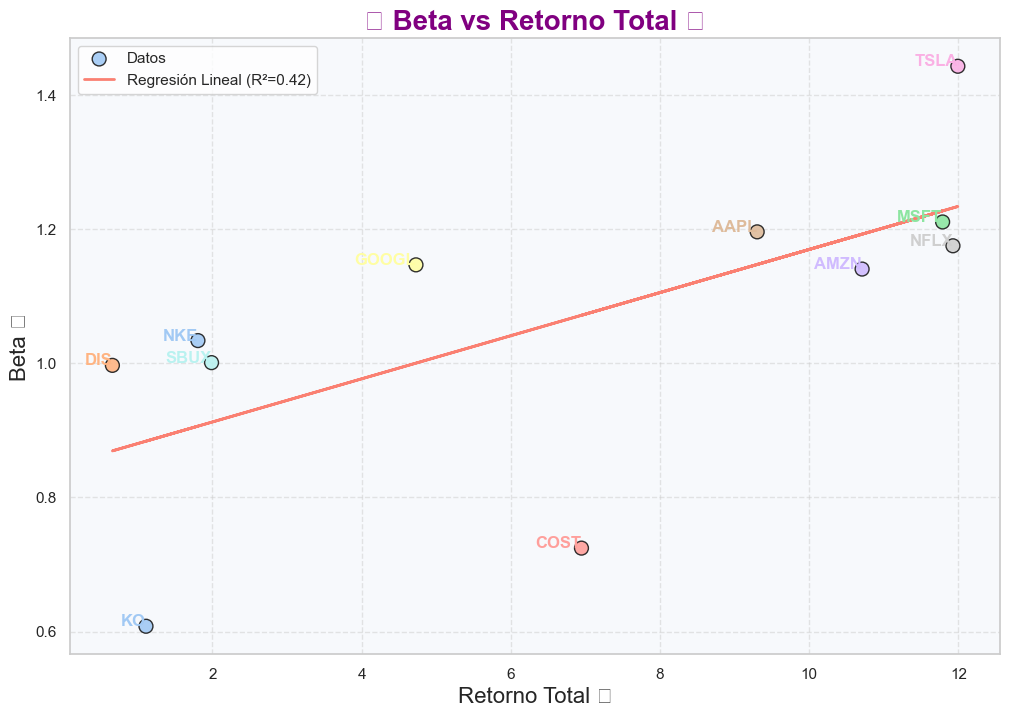

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Configure the style of seaborn
sns.set(style="whitegrid")

# Create a pastel color palette
pastel_colors = sns.color_palette("pastel", len(tickers))

# Extract returns and betas
returns = [result["stock_total_return"] for result in results]
betas = [result["beta"] for result in results]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(returns, betas)
line = [slope * x + intercept for x in returns]

# Create the plot
plt.figure(figsize=(12, 8))
plt.scatter(returns, betas, color=pastel_colors, s=100, edgecolor='k', alpha=0.9, label='Datos', marker='o')
plt.plot(returns, line, color='salmon', linewidth=2, label=f'Regresión Lineal (R²={r_value**2:.2f})')

# Title and labels with a cute touch
plt.title('📈 Beta vs Retorno Total 🌈', fontsize=20, fontweight='bold', color='purple')
plt.xlabel('Retorno Total 📊', fontsize=16)
plt.ylabel('Beta 🔍', fontsize=16)
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)

# Add labels to points
for i, ticker in enumerate(tickers):
    plt.annotate(ticker, (returns[i], betas[i]), fontsize=12, ha='right', color=pastel_colors[i], fontweight='bold')

# Add a cute background color
plt.gca().set_facecolor('#f7f9fc')

plt.show()